LightGBM

Generalized Additive Models (GAM) 

Convolutional Neural Networks (CNN) 

Long Short-Term Memory Networks (LSTM) 

Transformer-based Models

Wavenet

InceptionTime

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./solar_weather_processed.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Energy delta_Wh  196776 non-null  int64  
 1   GHI              196776 non-null  float64
 2   temp             196776 non-null  float64
 3   pressure         196776 non-null  float64
 4   humidity         196776 non-null  float64
 5   wind_speed       196776 non-null  float64
 6   rain_1h          196776 non-null  float64
 7   clouds_all       196776 non-null  float64
 8   Year             196776 non-null  int64  
 9   Month_num        196776 non-null  int64  
 10  DayOfYear        196776 non-null  int64  
 11  Minute           196776 non-null  int64  
 12  Hour             196776 non-null  int64  
 13  Season           196776 non-null  int64  
 14  Day              196776 non-null  int64  
 15  Week_cos         196776 non-null  float64
 16  Energy_lag_1     196776 non-null  floa

## Forward Feature Selection

In [4]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from lightgbm import LGBMRegressor
# from sklearn.feature_selection import SequentialFeatureSelector
# from sklearn.model_selection import TimeSeriesSplit

# # Assume df is your DataFrame
# target_col = "Energy delta_Wh"
# X = df.drop(columns=[target_col])
# y = df[target_col]

# # Use TimeSeriesSplit to respect the order in time-series data
# tscv = TimeSeriesSplit(n_splits=3)

# # Initialize the LightGBM regressor (using GPU if available)
# model = LGBMRegressor(random_state=42, device='gpu')

# # Perform forward feature selection to select (for example) 10 features.
# # Adjust n_features_to_select as needed.
# sfs = SequentialFeatureSelector(
#     model,
#     n_features_to_select=10,
#     direction='forward',
#     cv=tscv,
#     scoring='neg_root_mean_squared_error',
#     n_jobs=-1
# )
# sfs.fit(X, y)

# # Retrieve the selected features
# selected_features = X.columns[sfs.get_support()]
# print("Selected features:", list(selected_features))

# # Train the model using only the selected features
# X_selected = X[selected_features]
# model.fit(X_selected, y)

# # Get the built-in feature importance from LightGBM
# importances = model.feature_importances_
# importance_df = pd.DataFrame({
#     'Feature': selected_features,
#     'Importance': importances
# }).sort_values(by='Importance', ascending=False)

# # Display the feature importance table
# print("\nFeature Contribution Table:")
# print(importance_df)

# # Plot the feature importance as a bar chart
# plt.figure(figsize=(10, 6))
# plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
# plt.xlabel("Feature Importance")
# plt.title("Feature Contribution to Model Prediction")
# plt.gca().invert_yaxis()  # Show highest importance on top
# plt.show()


In [5]:
# # Define the list of features based on the feature contribution table
# selected_features = [
#     "GHI", "Energy_lag_1", "Energy_lag_2", "Hour", 
#     "DayOfYear", "Week_cos", "clouds_all", "Year", 
#     "Minute", "rain_1h"
# ]

# # Option 1: Filter to keep only the selected features
# # df_filtered = df[selected_features]

# # Option 2: If you want to keep the target column as well, include it:
# df = df[selected_features + ["Energy delta_Wh"]]

# # Display the first few rows of the filtered DataFrame
# print(df.head())


# Seperate file for model buiding only


In [6]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error


In [7]:
# 6. Define X (features) and y (target)
FEATURES = [col for col in df.columns if col != 'Energy delta_Wh']
X = df[FEATURES]
y = df['Energy delta_Wh']

In [8]:
# 7. Time-based train-test split (80-20)
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

## Models

### ligbtGBM

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current va

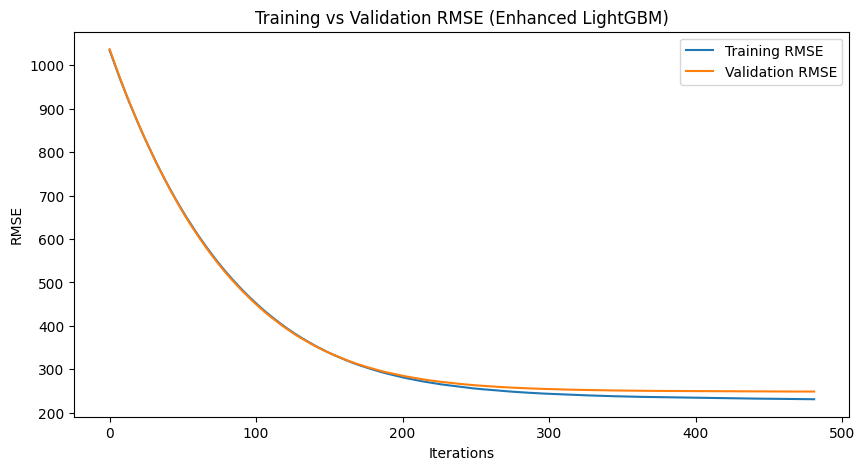

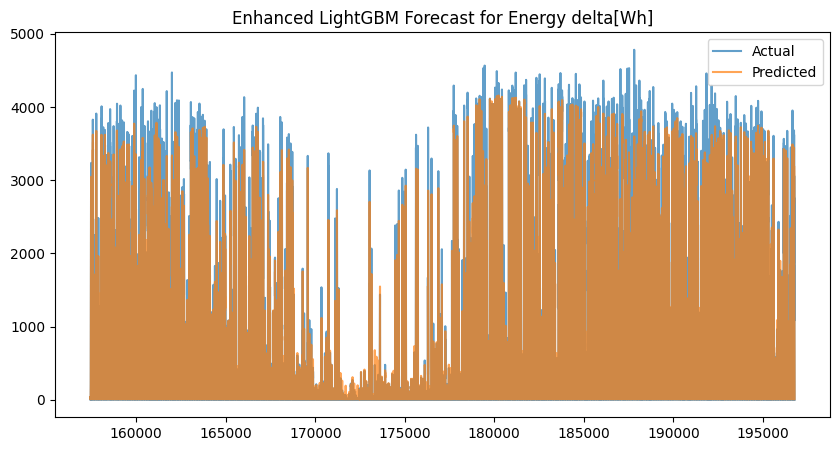

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor, early_stopping, record_evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Enhanced LightGBM parameters for better accuracy
model = LGBMRegressor(
    n_estimators=1000,         # Increase number of boosting rounds
    learning_rate=0.01,        # Lower learning rate for gradual learning
    max_depth=6,
    num_leaves=31,
    bagging_fraction=0.8,      # Use bagging (subsample)
    feature_fraction=0.8,      # Use feature subsampling
    lambda_l1=0.1,             # L1 regularization
    lambda_l2=0.1,             # L2 regularization
    random_state=42,
    device='gpu'               # Use GPU (if available and GPU-enabled version is installed)
)

evals_result = {}  # Dictionary to store training history

# Train the model with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric="rmse",
    callbacks=[early_stopping(stopping_rounds=10), record_evaluation(evals_result)]
)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
epsilon = 1e-8  # Small constant to avoid division by zero
mape = (np.abs(y_test - y_pred) / np.where(y_test == 0, epsilon, y_test)).mean() * 100

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)


# Plot Training vs Validation RMSE over iterations
plt.figure(figsize=(10, 5))
plt.plot(evals_result["training"]["rmse"], label="Training RMSE")
plt.plot(evals_result["valid_1"]["rmse"], label="Validation RMSE")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.title("Training vs Validation RMSE (Enhanced LightGBM)")
plt.legend()
plt.show()

# Plot Predictions vs Actual
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual', alpha=0.7)
plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
plt.title("Enhanced LightGBM Forecast for Energy delta[Wh]")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor, record_evaluation
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define a parameter grid tailored for time-series forecasting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [4, 6],
    'num_leaves': [20, 31]
}

# Set up TimeSeriesSplit for cross-validation (ensuring training data precedes validation data)
tscv = TimeSeriesSplit(n_splits=3)

# Initialize the LightGBM regressor with GPU support
lgbm = LGBMRegressor(random_state=42, device='gpu')  # If needed, add gpu_platform_id and gpu_device_id

# Set up GridSearchCV using the time-series split
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # We use negative RMSE (higher is better)
    cv=tscv,
    verbose=2,
    n_jobs=-1
)

# Fit the grid search on the training data (make sure X_train and y_train are ordered by time)
grid_search.fit(X_train, y_train)

# Output the best parameters and the corresponding CV RMSE
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE (CV):", -grid_search.best_score_)

# Retrieve the best estimator from grid search
best_model = grid_search.best_estimator_

# Optionally, record evaluation history using callbacks for monitoring over iterations
evals_result = {}
best_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric="rmse",
    callbacks=[record_evaluation(evals_result)]
)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate predictions
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print("MAE:", mae)
print("RMSE:", rmse)

# Plot the training and validation RMSE over iterations to check for overfitting
plt.figure(figsize=(10, 5))
plt.plot(evals_result["training"]["rmse"], label="Training RMSE")
plt.plot(evals_result["valid_1"]["rmse"], label="Validation RMSE")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.title("Training vs Validation RMSE (Time-Series)")
plt.legend()
plt.show()

# Plot Predictions vs. Actual (ensure that y_test is a Pandas Series with a DateTime index)
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual', alpha=0.7)
plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
plt.title("LightGBM Forecast for Energy Consumption")
plt.legend()
plt.show()


Fitting 3 folds for each of 243 candidates, totalling 729 fits


KeyboardInterrupt: 

### GAM

In [ ]:
from pygam import LinearGAM, s

# Define GAM model with smooth terms for each feature
gam = LinearGAM(
    s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) 
    # + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16)
).fit(X, y)

# Print model summary
print(gam.summary())

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    149.6691
Link Function:                     IdentityLink Log Likelihood:                              -2381388.7444
Number of Samples:                       196776 AIC:                                          4763078.8269
                                                AICc:                                         4763079.0593
                                                GCV:                                            72002.2664
                                                Scale:                                          71903.6954
                                                Pseudo R-Squared:                                   0.9342
Feature Function                  Lam

C:\Users\User\AppData\Local\Temp\ipykernel_34864\1363717884.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on test set
y_pred = gam.predict(X_test)

# Compute accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
epsilon = 1e-8  # Small constant to avoid division by zero
mape = (np.abs(y_test - y_pred) / np.where(y_test == 0, epsilon, y_test)).mean() * 100


# Print results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")


MAE: 137.2964
MSE: 75963.5196
RMSE: 275.6148
MAPE: inf%


### CNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


# 3. Normalize Data (CNNs work better with scaled inputs)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.to_numpy().reshape(-1, 1))

# 4. Reshape Data for CNN [Samples, Time Steps, Features]
TIME_STEPS = 10  # Number of previous time steps to use for prediction

def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i : i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, TIME_STEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, TIME_STEPS)

# 5. Build CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(TIME_STEPS, X_train.shape[1])),
    Dropout(0.2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# 6. Train the Model
history = model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_test_seq, y_test_seq), verbose=1)

# 7. Make Predictions
y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# 8. Evaluate the Model
mae = mean_absolute_error(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)
rmse = np.sqrt(mse)
mape = (np.abs(y_test_seq - y_pred) / np.where(y_test_seq == 0, epsilon, y_test_seq)).mean() * 100

# 9. Print Performance Metrics
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")


Epoch 1/20
4920/4920 [==============================] - 8s 2ms/step - loss: 0.0049 - val_loss: 0.0038
Epoch 2/20
4920/4920 [==============================] - 7s 1ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 3/20
4920/4920 [==============================] - 8s 2ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 4/20
4920/4920 [==============================] - 7s 2ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 5/20
4920/4920 [==============================] - 7s 2ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 6/20
4920/4920 [==============================] - 9s 2ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 7/20
4920/4920 [==============================] - 8s 2ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 8/20
4920/4920 [==============================] - 9s 2ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 9/20
4920/4920 [==============================] - 9s 2ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 10/20
4920/4920 [==============================] - 8s 2ms/step - loss: 0.003

C:\Users\User\AppData\Local\Temp\ipykernel_34864\1712566322.py:53: RuntimeWarning: divide by zero encountered in divide
  mape = (abs(y_test_seq - y_pred) / y_test_seq).mean() * 100


### LSTM

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Scale Data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

y_train_array = y_train.to_numpy().reshape(-1, 1)
y_test_array = y_test.to_numpy().reshape(-1, 1)

y_train_scaled = scaler_y.fit_transform(y_train_array)
y_test_scaled = scaler_y.transform(y_test_array)

X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# 2. Create Sequences
TIME_STEPS = 10

def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i : i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, TIME_STEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, TIME_STEPS)

# 3. Build a Deeper LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(TIME_STEPS, X_train.shape[1])),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# 4. Train the Model
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_seq, y_test_seq),
    verbose=1
)

# 5. Make Predictions
y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# 6. Evaluate the Model
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

mae = mean_absolute_error(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)
rmse = root_mean_squared_error(y_test_seq, y_pred)

# MAPE can be infinite if y_test_seq has zeros; consider SMAPE or filtering out zeros if needed
mape = (np.abs(y_test_seq - y_pred) / np.where(y_test_seq == 0, epsilon, y_test_seq)).mean() * 100

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")


Epoch 1/20
4920/4920 [==============================] - 80s 15ms/step - loss: 0.0052 - val_loss: 0.0038
Epoch 2/20
4920/4920 [==============================] - 79s 16ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 3/20
4920/4920 [==============================] - 75s 15ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 4/20
4920/4920 [==============================] - 75s 15ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 5/20
4920/4920 [==============================] - 75s 15ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 6/20
4920/4920 [==============================] - 76s 15ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 7/20
4920/4920 [==============================] - 76s 15ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 8/20
4920/4920 [==============================] - 79s 16ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 9/20
4920/4920 [==============================] - 83s 17ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 10/20
4920/4920 [==============================] - 72s 15m

C:\Users\User\AppData\Local\Temp\ipykernel_34864\929697950.py:70: RuntimeWarning: divide by zero encountered in divide
  mape = (abs(y_test_seq - y_pred) / y_test_seq).mean() * 100


## Transformer

In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, LayerNormalization, MultiHeadAttention
)
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ...existing code...
# 1. Scale Data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

y_train_array = y_train.to_numpy().reshape(-1, 1)
y_test_array = y_test.to_numpy().reshape(-1, 1)

y_train_scaled = scaler_y.fit_transform(y_train_array)
y_test_scaled = scaler_y.transform(y_test_array)

X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# 2. Create Sequences
TIME_STEPS = 10

def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i : i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, TIME_STEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, TIME_STEPS)

# 3. Build a Simple Transformer Encoder Block
def transformer_encoder(inputs, d_model, num_heads, ff_dim, rate=0.1):
    # Map input features to d_model (e.g., 17 -> 64)
    x = Dense(d_model)(inputs)

    # Multi-Head Attention
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(x, x)
    attention_output = Dropout(rate)(attention_output)
    out1 = LayerNormalization(epsilon=1e-6)(x + attention_output)
    
    # Feed Forward
    ffn_output = Dense(ff_dim, activation='relu')(out1)
    ffn_output = Dense(d_model)(ffn_output)
    ffn_output = Dropout(rate)(ffn_output)
    out2 = LayerNormalization(epsilon=1e-6)(out1 + ffn_output)
    return out2

d_model = 64  # Hidden size of the model
num_heads = 2  # Number of attention heads
ff_dim = 128   # Feed-forward layer dimension
dropout_rate = 0.2

inputs = Input(shape=(TIME_STEPS, X_train.shape[1]))
x = transformer_encoder(inputs, d_model, num_heads, ff_dim, dropout_rate)
x = transformer_encoder(x, d_model, num_heads, ff_dim, dropout_rate)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(dropout_rate)(x)
outputs = Dense(1)(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse')

# 4. Train the Model
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_seq, y_test_seq),
    verbose=1
)

# 5. Make Predictions
y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# 6. Evaluate the Model
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

mae = mean_absolute_error(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)
rmse = root_mean_squared_error(y_test_seq, y_pred)
mape = (np.abs(y_test_seq - y_pred) / np.where(y_test_seq == 0, epsilon, y_test_seq)).mean() * 100


print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")


Epoch 1/20
4920/4920 [==============================] - 50s 10ms/step - loss: 0.0088 - val_loss: 0.0050
Epoch 2/20
4920/4920 [==============================] - 59s 12ms/step - loss: 0.0064 - val_loss: 0.0040
Epoch 3/20
4920/4920 [==============================] - 59s 12ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 4/20
4920/4920 [==============================] - 62s 13ms/step - loss: 0.0057 - val_loss: 0.0045
Epoch 5/20
4920/4920 [==============================] - 58s 12ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 6/20
4920/4920 [==============================] - 64s 13ms/step - loss: 0.0055 - val_loss: 0.0037
Epoch 7/20
4920/4920 [==============================] - 65s 13ms/step - loss: 0.0055 - val_loss: 0.0037
Epoch 8/20
4920/4920 [==============================] - 67s 14ms/step - loss: 0.0053 - val_loss: 0.0036
Epoch 9/20
4920/4920 [==============================] - 67s 14ms/step - loss: 0.0051 - val_loss: 0.0039
Epoch 10/20
4920/4920 [==============================] - 64s 13m

C:\Users\User\AppData\Local\Temp\ipykernel_34864\320902340.py:91: RuntimeWarning: divide by zero encountered in divide
  mape = (abs(y_test_seq - y_pred) / y_test_seq).mean() * 100


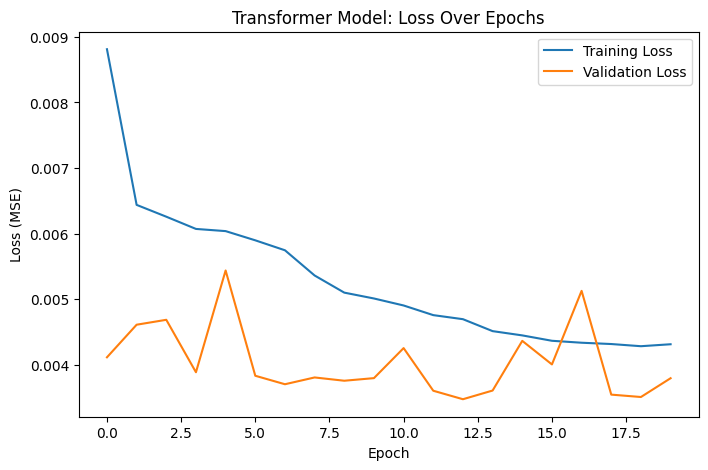

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Transformer Model: Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf

def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Give it a name so Keras can display it
root_mean_squared_error.__name__ = 'rmse'


Epoch 1/20
4920/4920 [==============================] - 145s 29ms/step - loss: 0.0043 - rmse: 0.0620 - val_loss: 0.0038 - val_rmse: 0.0413
Epoch 2/20
4920/4920 [==============================] - 127s 26ms/step - loss: 0.0043 - rmse: 0.0619 - val_loss: 0.0042 - val_rmse: 0.0446
Epoch 3/20
4920/4920 [==============================] - 122s 25ms/step - loss: 0.0043 - rmse: 0.0619 - val_loss: 0.0035 - val_rmse: 0.0394
Epoch 4/20
4920/4920 [==============================] - 121s 25ms/step - loss: 0.0043 - rmse: 0.0617 - val_loss: 0.0038 - val_rmse: 0.0401
Epoch 5/20
4920/4920 [==============================] - 121s 25ms/step - loss: 0.0043 - rmse: 0.0618 - val_loss: 0.0041 - val_rmse: 0.0428
Epoch 6/20
4920/4920 [==============================] - 131s 27ms/step - loss: 0.0042 - rmse: 0.0614 - val_loss: 0.0036 - val_rmse: 0.0388
Epoch 7/20
4920/4920 [==============================] - 123s 25ms/step - loss: 0.0043 - rmse: 0.0617 - val_loss: 0.0037 - val_rmse: 0.0438
Epoch 8/20
4920/4920 [=====

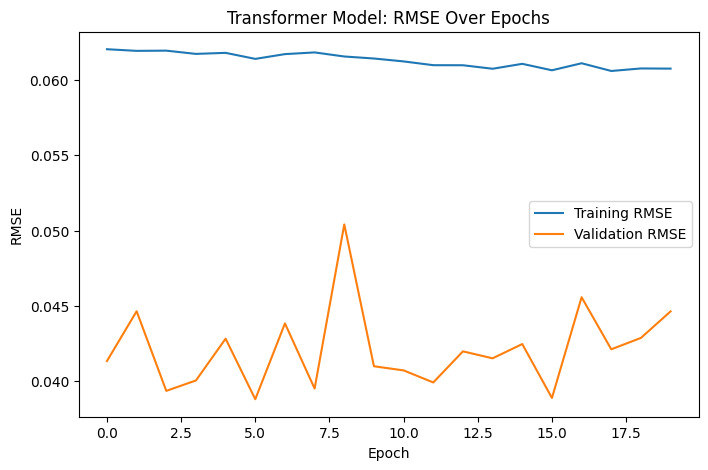

In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf

def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Give it a name so Keras can display it
root_mean_squared_error.__name__ = 'rmse'


model.compile(
    optimizer='adam',
    loss='mse',            # Primary loss for training
    metrics=[root_mean_squared_error]  # Track RMSE each epoch
)


history = model.fit(
    X_train_seq, y_train_seq,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_seq, y_test_seq),
    verbose=1
)


plt.figure(figsize=(8, 5))
plt.plot(history.history['rmse'], label='Training RMSE')
plt.plot(history.history['val_rmse'], label='Validation RMSE')
plt.title("Transformer Model: RMSE Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()


## InceptionTime

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -----------------------------
# 1. Scale Data
# -----------------------------
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

y_train_array = y_train.to_numpy().reshape(-1, 1)
y_test_array = y_test.to_numpy().reshape(-1, 1)

y_train_scaled = scaler_y.fit_transform(y_train_array)
y_test_scaled = scaler_y.transform(y_test_array)

X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# -----------------------------
# 2. Create Sequences
# -----------------------------
TIME_STEPS = 10

def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i : i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, TIME_STEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, TIME_STEPS)

# -----------------------------
# InceptionTime Modules
# -----------------------------
def inception_module(x, filters=32, kernel_sizes=[3, 5, 7], bottleneck=32):
    # Bottleneck to reduce dimensionality if input channels are large
    if bottleneck and x.shape[-1] > bottleneck:
        x = layers.Conv1D(bottleneck, 1, padding='same', activation='relu')(x)
    
    conv_branches = []
    for k in kernel_sizes:
        branch = layers.Conv1D(filters, k, padding='same', activation='relu')(x)
        conv_branches.append(branch)
    
    # MaxPool branch
    pool_branch = layers.MaxPooling1D(pool_size=3, strides=1, padding='same')(x)
    pool_branch = layers.Conv1D(filters, 1, padding='same', activation='relu')(pool_branch)
    conv_branches.append(pool_branch)
    
    # Concatenate all branches
    x = layers.Concatenate()(conv_branches)
    x = layers.BatchNormalization()(x)
    return x

def build_inceptiontime(input_shape, num_modules=3, filters=32, kernel_sizes=[3, 5, 7]):
    inputs = layers.Input(shape=input_shape)
    x = inputs
    
    for _ in range(num_modules):
        x = inception_module(x, filters=filters, kernel_sizes=kernel_sizes)
    
    # Global Average Pooling
    x = layers.GlobalAveragePooling1D()(x)
    
    # Dense layers
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(1)(x)
    
    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# -----------------------------
# 3. Build InceptionTime Model
# -----------------------------
inception_model = build_inceptiontime(
    input_shape=(TIME_STEPS, X_train.shape[1]),
    num_modules=3,      # number of inception modules
    filters=32,         # conv filters
    kernel_sizes=[3,5,7]  # different kernel sizes for multi-scale
)

# -----------------------------
# 4. Train the Model
# -----------------------------
history = inception_model.fit(
    X_train_seq, y_train_seq,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_seq, y_test_seq),
    verbose=1
)

# -----------------------------
# 5. Make Predictions
# -----------------------------
y_pred_scaled = inception_model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# -----------------------------
# 6. Evaluate the Model
# -----------------------------
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

mae = mean_absolute_error(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)
rmse = root_mean_squared_error(y_test_seq, y_pred)
mape = (abs(y_test_seq - y_pred) / y_test_seq).mean() * 100

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")


Epoch 1/20
4920/4920 [==============================] - 56s 11ms/step - loss: 0.0098 - val_loss: 0.0047
Epoch 2/20
4920/4920 [==============================] - 43s 9ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 3/20
4920/4920 [==============================] - 43s 9ms/step - loss: 0.0044 - val_loss: 0.0037
Epoch 4/20
4920/4920 [==============================] - 45s 9ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 5/20
4920/4920 [==============================] - 45s 9ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 6/20
4920/4920 [==============================] - 48s 10ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 7/20
4920/4920 [==============================] - 45s 9ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 8/20
4920/4920 [==============================] - 44s 9ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 9/20
4920/4920 [==============================] - 49s 10ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 10/20
4920/4920 [==============================] - 50s 10ms/step

C:\Users\User\AppData\Local\Temp\ipykernel_34864\1047172755.py:115: RuntimeWarning: divide by zero encountered in divide
  mape = (abs(y_test_seq - y_pred) / y_test_seq).mean() * 100
